In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [7]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [8]:
#To ensure the Gpu is present or not
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available.")
else:
    print("GPU is not available.")

GPU is available.


In [9]:
#load and explore the dataset
train_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"
test_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test"
val_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val"

In [10]:
#List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Nunber of classes: {num_classes}')
print(f'Classes: {classes}')


Nunber of classes: 2
Classes: ['nofire', 'fire']


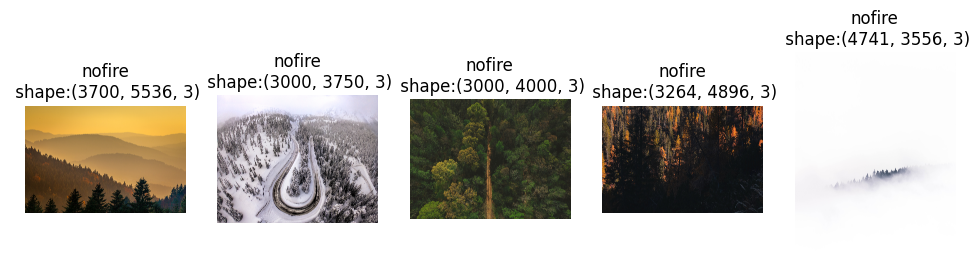

In [11]:
#let's visualize the images in dataset
plt.figure(figsize=(12, 10))
for i in range(5):
    class_path = os.path.join(train_dir, classes[0])
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[0]}\n shape:{img.shape}')
    plt.axis('off')

plt.show()



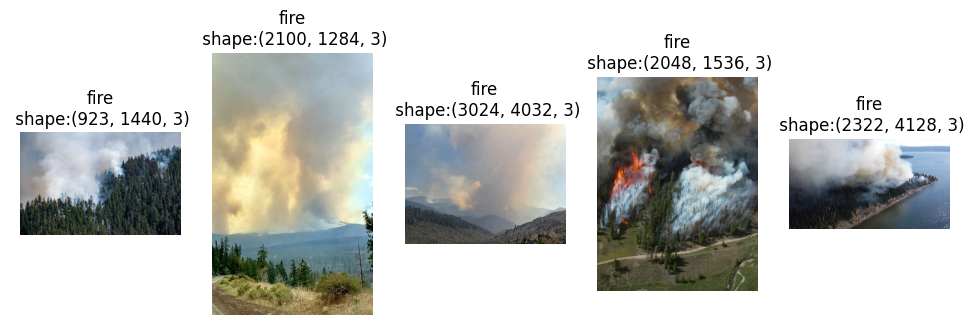

In [12]:
plt.figure(figsize=(12, 10))
for i in range(5):
    class_path = os.path.join(train_dir, classes[1])
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[1]}\n shape:{img.shape}')
    plt.axis('off')

plt.show()

In [13]:
# Preprocessing
# Image edimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [14]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [15]:
# Let's build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)


In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 12,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
11/58 ━━━━━━━━━━━━━━━━━━━━ 5:24 7s/step - accuracy: 0.5319 - loss: 1.8172

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


27/58 ━━━━━━━━━━━━━━━━━━━━ 3:27 7s/step - accuracy: 0.5725 - loss: 1.3892

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 495s 8s/step - accuracy: 0.6077 - loss: 1.0782 - val_accuracy: 0.7370 - val_loss: 0.5043
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8125 - loss: 0.4970

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8125 - loss: 0.4970 - val_accuracy: 0.7135 - val_loss: 0.5272
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 493s 8s/step - accuracy: 0.7486 - loss: 0.5139 - val_accuracy: 0.7396 - val_loss: 0.4843
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8438 - loss: 0.4886 - val_accuracy: 0.7396 - val_loss: 0.4875
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 511s 8s/step - accuracy: 0.7695 - loss: 0.4871 - val_accuracy: 0.7109 - val_loss: 0.4812
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8125 - loss: 0.3498 - val_accuracy: 0.7083 - val_loss: 0.4968
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 461s 8s/step - accuracy: 0.7779 - loss: 0.4557 - val_accuracy: 0.7031 - val_loss: 0.5694
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8438 - loss: 0.4527 - val_accuracy: 0.7031 - val_loss: 0.5689
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 446s 8s/step - accuracy: 0.7649 - loss: 0.4795 - val_accuracy: 0.7708 - val_loss: 0.461

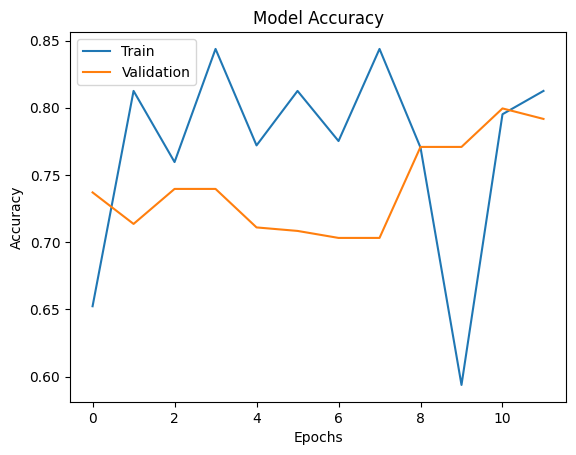

In [30]:
# Evaluate the model - plotting training and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

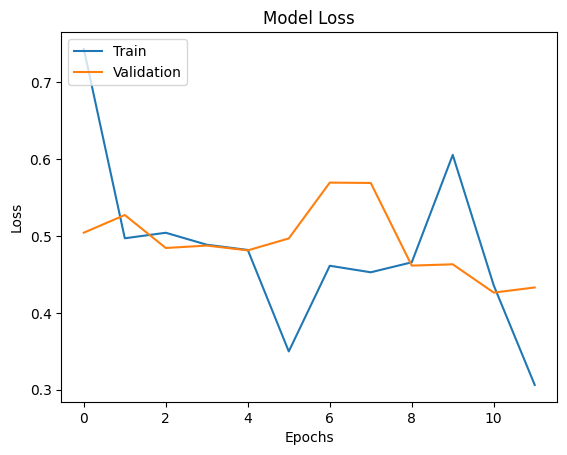

In [34]:
# Evaluate the model - plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [33]:
# Evaluate the model using test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

 5/12 ━━━━━━━━━━━━━━━━━━━━ 48s 7s/step - accuracy: 0.7903 - loss: 0.4483

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 7/12 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step - accuracy: 0.8008 - loss: 0.4325

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.8081 - loss: 0.4170
Test Accuracy: 0.8073


In [35]:
# Save the model
model.save('FFD.keras')

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150,150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


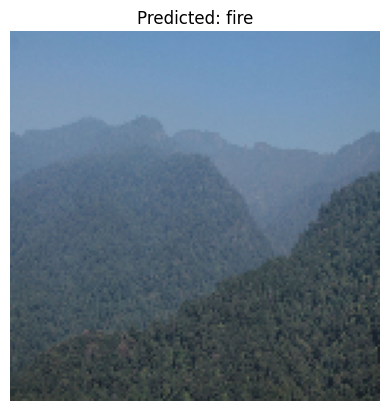

In [42]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/33696343816_811bd98925_o.jpg')